# Análise de dados de COVID

Oficial Number: https://transparencia.registrocivil.org.br/especial-covid

ImfoGripe: https://gitlab.procc.fiocruz.br/mave/repo/-/tree/master/Dados/InfoGripe


Nem todo mundo que tem SRAG tem COVID
Pode ser por bacteria ou por outra coisa 

Não confundir:
- SARS-COV / SRAG
- Nome / Síndrome que pode ser causada por várias coisas

SRAG = insuficiência respiratória = Síndrome Respiratória Aguda Grave 

SRAG é a evolução grave da doença


In [6]:
import csv
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

# variável que vou armazenar todos os dados
_complete_dataset = []
filtered_data = []

file_csv = 'Dados_InfoGripe_serie_temporal_com_estimativas_recentes.csv'

In [70]:
# Filtros
data = 'obito'
scale = 'casos'
# years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
years = ['2019','2020']

# states = ["Acre","Alagoas","Amapá","Amazonas","Bahia","Ceará","Distrito Federal","Espírito Santo","Goiás","Maranhão","Mato Grosso","Mato Grosso do Sul","Minas Gerais","Pará","Paraíba","Paraná","Pernambuco","Piauí","Rio de Janeiro","Rio Grande do Norte","Rio Grande do Sul","Rondônia","Roraima","São Paulo","Santa Catarina","Sergipe","Tocantins"]
states = ["Acre","Alagoas","Amapá","Amazonas","Bahia","Ceará","Distrito Federal","Espírito Santo","Goiás","Maranhão","Mato Grosso","Mato Grosso do Sul","Minas Gerais","Pará","Paraíba","Paraná","Pernambuco","Piauí","Rio de Janeiro","Rio Grande do Norte","Rio Grande do Sul","Rondônia","Roraima","São Paulo","Santa Catarina","Sergipe","Tocantins"]

In [71]:
def lines_counter(array):
    return sum(1 for row in array)


def filter_by_column(index, value, array_src):
    return list(filter(lambda p: str(value) == str(p[index]), array_src))
       

# Filtering phase
def filter_data(dataset, year, scale, state, data):
    filtered = filter_by_column(2, state, dataset)
    filtered = filter_by_column(4, data, filtered)
    filtered = filter_by_column(5, scale, filtered)
    filtered = filter_by_column(6, year, filtered)
    return filtered

In [72]:
# initialize the data
infoGripe_df = pd.read_csv(file_csv, delimiter=';', decimal=',')

# Convert
_complete_dataset = list([[row[col] for col in infoGripe_df.columns] for row in infoGripe_df.to_dict('records')])

In [73]:
dictionary = {}

for state in states:
    print("\nEstado: "+state)
    total_obitos = 0
    obitos_2019 = 0
    obitos_2020 = 0
    
    for year in years:
        obitos = 0
        filtered_data = filter_data(_complete_dataset, year, scale, state, data)

        for row in filtered_data:
    #         print(row[9])
            if row[9] is not '':
                if not np.isnan(row[9]):
                    obitos = obitos + round(row[9])
                    
        if year == '2019':
            obitos_2019 = obitos
        if year == '2020':
            obitos_2020 = obitos
            
        dictionary[state] = {str(obitos_2019), str(obitos_2020)}
                    
        if len(filtered_data) == 0:
            print("Erro em alguma informação.")
        else:
#             print('\nAno: '+str(filtered_data[0][6]))
#             print(filtered_data[0][5]+' : '+str(obitos))

            total_obitos = total_obitos + obitos
    print('\nTotal de casos: '+str(total_obitos))
    
print(dictionary)


Estado: Acre

Total de casos: 93

Estado: Alagoas

Total de casos: 73

Estado: Amapá

Total de casos: 13

Estado: Amazonas

Total de casos: 881

Estado: Bahia

Total de casos: 236

Estado: Ceará

Total de casos: 557

Estado: Distrito Federal

Total de casos: 142

Estado: Espírito Santo

Total de casos: 111

Estado: Goiás

Total de casos: 275

Estado: Maranhão

Total de casos: 46

Estado: Mato Grosso

Total de casos: 83

Estado: Mato Grosso do Sul

Total de casos: 218

Estado: Minas Gerais

Total de casos: 722

Estado: Pará

Total de casos: 158

Estado: Paraíba

Total de casos: 134

Estado: Paraná

Total de casos: 918

Estado: Pernambuco

Total de casos: 389

Estado: Piauí

Total de casos: 82

Estado: Rio de Janeiro

Total de casos: 1064

Estado: Rio Grande do Norte

Total de casos: 131

Estado: Rio Grande do Sul

Total de casos: 440

Estado: Rondônia

Total de casos: 26

Estado: Roraima

Total de casos: 3

Estado: São Paulo

Total de casos: 3936

Estado: Santa Catarina

Total de casos

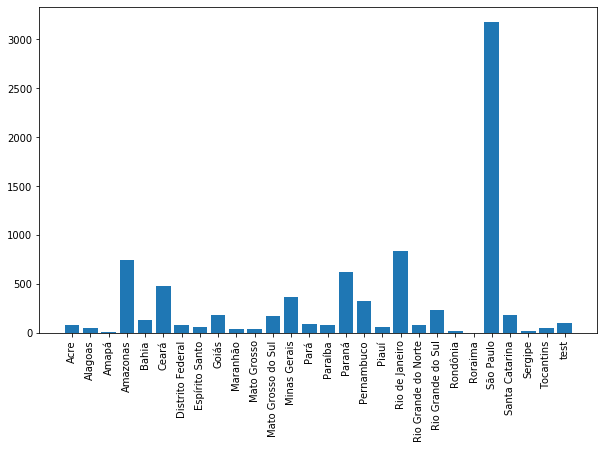

In [77]:
xs, ys=zip(*((int(x), k) for k in dictionary for x in dictionary[k]))

plt.rcParams['figure.figsize'] = (10,6)

plt.bar(ys, xs)
plt.xticks(rotation=90)
plt.show()

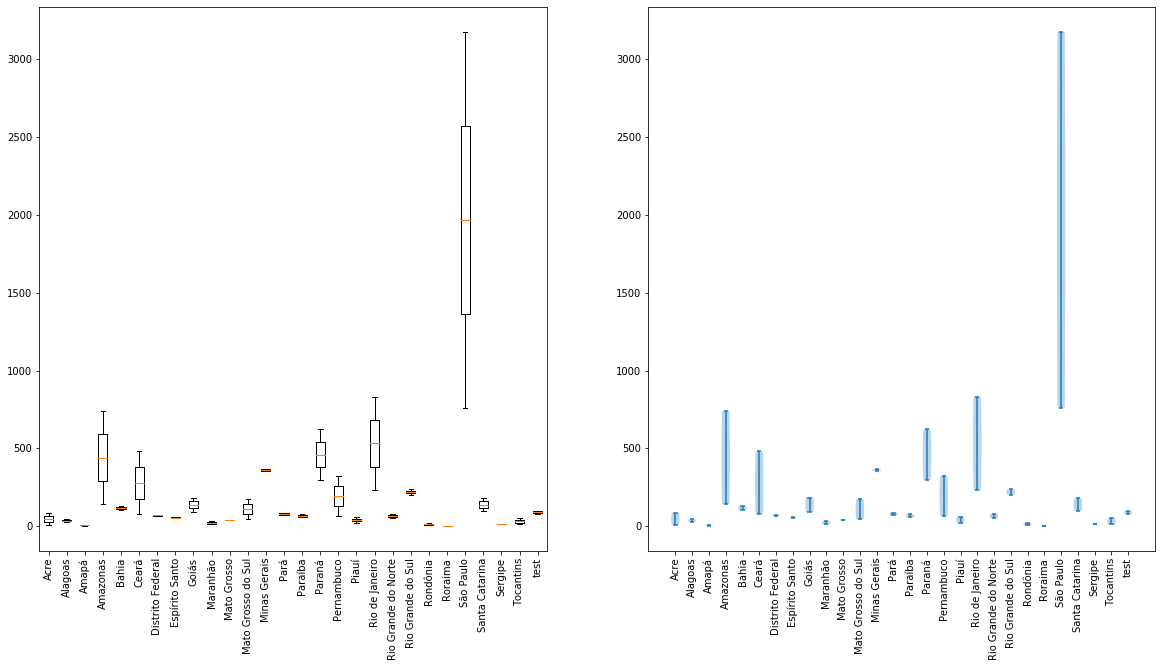

In [80]:
index= []
data = []
for i, (key, val) in enumerate(dictionary.items()):
    index.append(key)
    data.append(list(map(float, val)))

fig, (ax, ax2) = plt.subplots(ncols=2)

plt.rcParams['figure.figsize'] = (20,10)

ax.boxplot(data)
ax.set_xticklabels(index)

ax2.violinplot(data)
ax2.set_xticks(range(1,len(index)+1))
ax2.set_xticklabels(index) 

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()